In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
color_map = sns.color_palette("light:#00700c", as_cmap=True)

###IMDB

In [3]:
data_imdb_vs = [[0.9,0.92,1,2.05,0.004,0.21],
                [0.85,0.87,0.91,2.26,0.0039,0.26],
                [0.23,0.78,0.42,2.63,0.0052,0.36]]
                
index_col = ['imdb_imdb', 'imdb_yelp', 'imdb_sst']
df_imdb_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_imdb_vs)
df_imdb_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
imdb_imdb,0.90,0.92,1.00,2.05,0.0040,0.21
imdb_yelp,0.85,0.87,0.91,2.26,0.0039,0.26
imdb_sst,0.23,0.78,0.42,2.63,0.0052,0.36


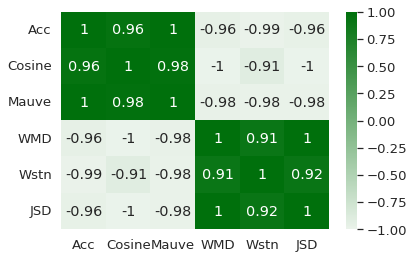

In [4]:
# pearson
sns.set(font_scale=1.2)
sns.heatmap(df_imdb_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

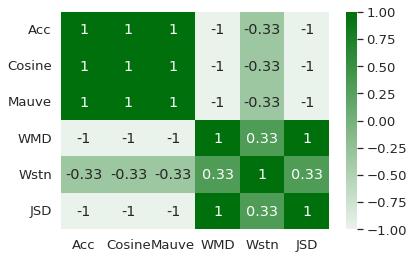

In [ ]:
# kendall correlation
sns.heatmap(df_imdb_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

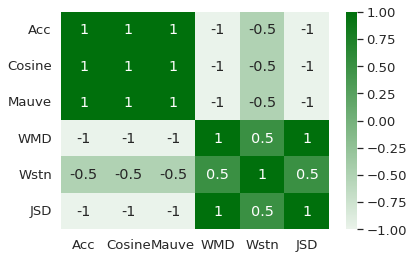

In [ ]:
# spearman correlation
sns.heatmap(df_imdb_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

##SST

In [ ]:
data_sst_vs = [[0.88,0.66,0.99,2.83,0.0032,0.46],
               [0.16,0.77,0.22,2.63,0.0051,0.38],
               [0.18,0.72,0.004,2.74,0.0046,0.41]]
               
index_col = ['sst_sst', 'sst_imdb', 'sst_yelp']
df_sst_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_sst_vs)
df_sst_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
sst_sst,0.88,0.66,0.990,2.83,0.0032,0.46
sst_imdb,0.16,0.77,0.220,2.63,0.0051,0.38
sst_yelp,0.18,0.72,0.004,2.74,0.0046,0.41


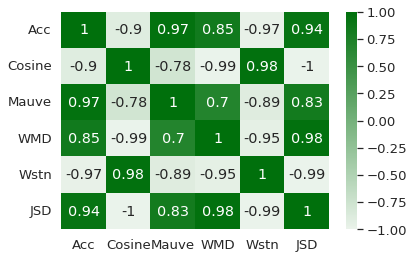

In [ ]:
sns.heatmap(df_sst_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

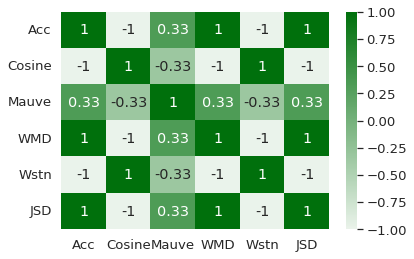

In [ ]:
# kendall correlation
sns.heatmap(df_sst_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

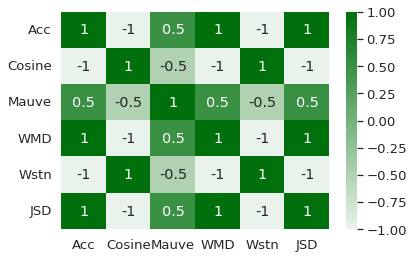

In [ ]:
# spearman correlation
sns.heatmap(df_sst_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

##Yelp

In [ ]:
data_yelp_vs = [[0.91,0.86,0.98,2.28,0.0036,0.26],
                [0.83,0.87,0.76,2.23,0.0041,0.27],
                [0.11,0.73,0.94,2.69,0.0038,0.4]]

index_col = ['yelp_yelp', 'yelp_imdb', 'yelp_sst']
df_yelp_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_yelp_vs)
df_yelp_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
yelp_yelp,0.91,0.86,0.98,2.28,0.0036,0.26
yelp_imdb,0.83,0.87,0.76,2.23,0.0041,0.27
yelp_sst,0.11,0.73,0.94,2.69,0.0038,0.40


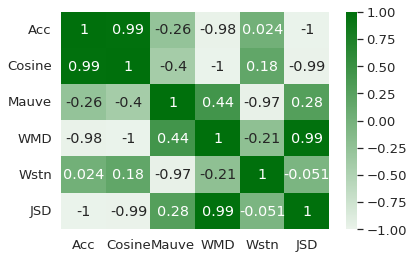

In [ ]:
sns.heatmap(df_yelp_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

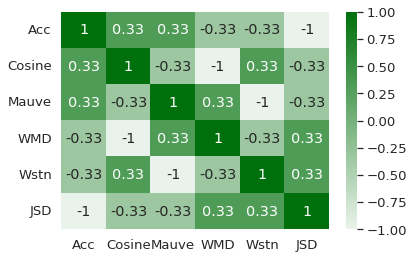

In [ ]:
# kendall correlation
sns.heatmap(df_yelp_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

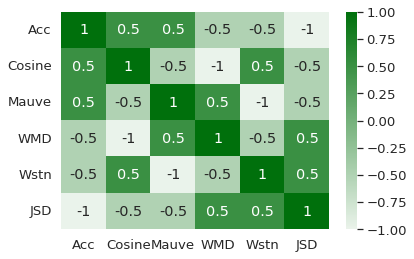

In [ ]:
# spearman correlation
sns.heatmap(df_yelp_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

##Average

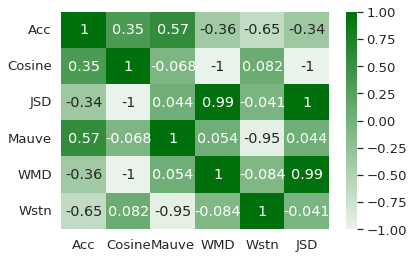

In [ ]:
# Pearson Correlation
def average_of_all_three(df_1, df_2, df_3, corr):        
    df_concat = pd.concat((df_1.corr(method=corr), df_2.corr(method=corr)))
    by_row_index = df_concat.groupby(df_concat.index)
    df_first_two_sum = by_row_index.sum()

    df_concat = pd.concat((df_first_two_sum, df_3.corr(method=corr)))
    by_row_index = df_concat.groupby(df_concat.index)
    df_sum = by_row_index.sum()

    sns.heatmap(df_sum/3, vmin=-1, vmax=1, annot=True, cmap=color_map)

average_of_all_three(df_imdb_vs, df_sst_vs, df_yelp_vs, 'pearson')

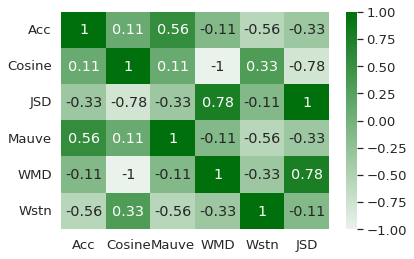

In [ ]:
# Kendall Correlation
average_of_all_three(df_imdb_vs, df_sst_vs, df_yelp_vs, 'kendall')

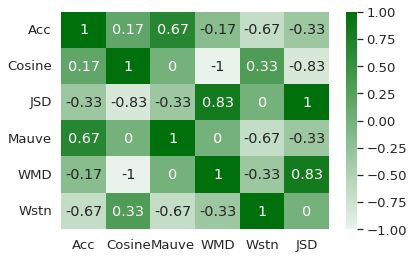

In [ ]:
# Spearman Correlation
average_of_all_three(df_imdb_vs, df_sst_vs, df_yelp_vs, 'spearman')

##Combined

In [ ]:
df_sentiment = df_imdb_vs.append(df_sst_vs)
df_sentiment = df_sentiment.append(df_yelp_vs)
df_sentiment

,Acc,Cosine,Mauve,WMD,Wstn,JSD
imdb_imdb,0.90,0.92,1.000,2.05,0.0040,0.21
imdb_yelp,0.85,0.87,0.910,2.26,0.0039,0.26
imdb_sst,0.23,0.78,0.420,2.63,0.0052,0.36
sst_sst,0.88,0.66,0.990,2.83,0.0032,0.46
sst_imdb,0.16,0.77,0.220,2.63,0.0051,0.38
sst_yelp,0.18,0.72,0.004,2.74,0.0046,0.41
yelp_yelp,0.91,0.86,0.980,2.28,0.0036,0.26
yelp_imdb,0.83,0.87,0.760,2.23,0.0041,0.27
yelp_sst,0.11,0.73,0.940,2.69,0.0038,0.40


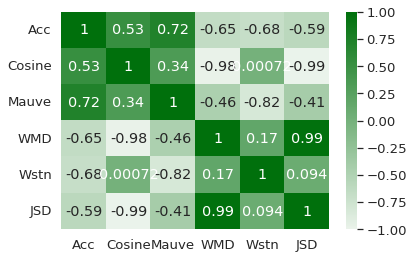

In [ ]:
# pearson correlation
sns.heatmap(df_sentiment.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

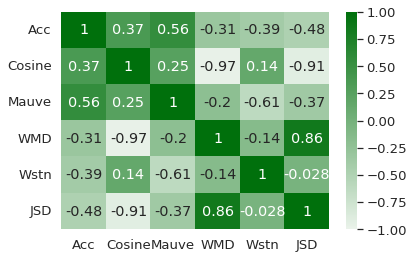

In [ ]:
# kendall correlation
sns.heatmap(df_sentiment.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

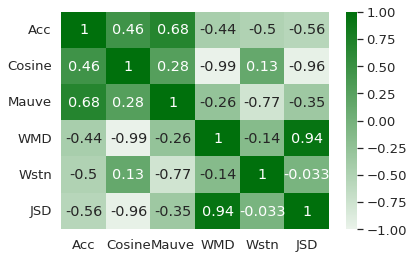

In [ ]:
# spearman correlation
sns.heatmap(df_sentiment.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)